# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [4]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
#get the html content
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [10]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [11]:
#locate the table
table = soup.find('table', class_='table') 

In [12]:
# Extract all rows of data
rows = soup.find_all("tr")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [19]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr', class_='data-row'):
    cells = [cell.text.strip() for cell in row.find_all('td')]
    rows.append(cells)

In [21]:
headers = [header.text.strip() for header in table.find_all('th')]

In [23]:
headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [25]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data = pd.DataFrame(rows, columns=headers)
mars_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [27]:
# Confirm DataFrame was created successfully
mars_data.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [30]:
# Examine data type of each column
print(mars_data.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [32]:
# Change data types for data analysis
mars_data['id'] = mars_data['id']
mars_data['terrestrial_date'] = pd.to_datetime(mars_data['terrestrial_date'])
mars_data['sol'] = mars_data ['sol'].astype('int32')
mars_data['ls'] = mars_data ['ls'].astype('int32')
mars_data ['month'] = mars_data ['month'].astype('int32')
mars_data ['min_temp'] = mars_data ['min_temp'].astype(float)
mars_data ['pressure'] = mars_data ['pressure'].astype(float)

# Confirm type changes were successful by examining data types again
print(mars_data.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [35]:
# 1. How many months are there on Mars?
num_months = mars_data['month'].nunique()
num_months

12

In [73]:
# 2. How many sols (Martian days) worth of data are there?
num_sol_days = mars_data['sol'].nunique()
num_sol_days

1867

In [77]:
#(extra) to see the total of terrestrial date
total_terrestrial_days = mars_data['terrestrial_date'].nunique()
total_terrestrial_days

1867

In [39]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_data.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

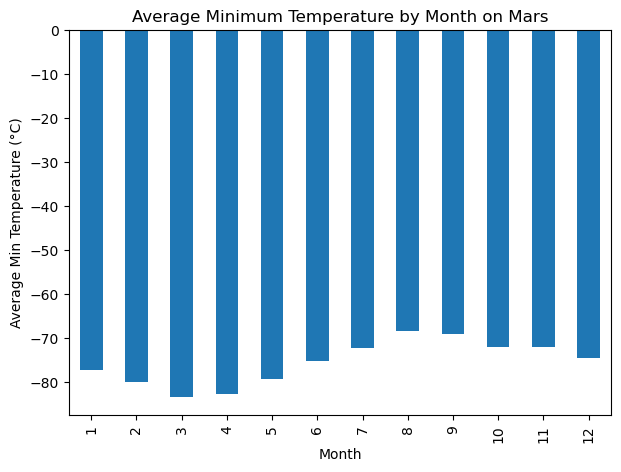

In [41]:
# Plot the average minimum temperature by month
plt.figure(figsize=(7, 5))
avg_min_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (°C)')
#plt.grid(axis='y')
plt.show()

In [141]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_hottest_by_month = avg_min_temp_by_month.sort_values()

In [45]:
coldest_hottest_by_month 

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [49]:
#display the coldest and hottest month
coldest_month = coldest_hottest_by_month.idxmin()
hottest_month = coldest_hottest_by_month.idxmax()

{"Coldest Month": coldest_month,"Hottest Month": hottest_month}

{'Coldest Month': 3, 'Hottest Month': 8}

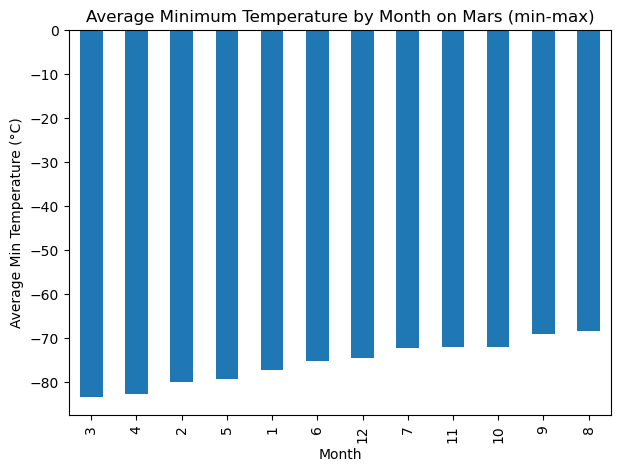

In [51]:
#plot the average minimum to maximum temperature by month
plt.figure(figsize=(7, 5))
coldest_hottest_by_month.plot(kind='bar')
plt.title('Average Minimum Temperature by Month on Mars (min-max)')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature (°C)')
#plt.grid(axis='y')
plt.show()

In [53]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_data.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

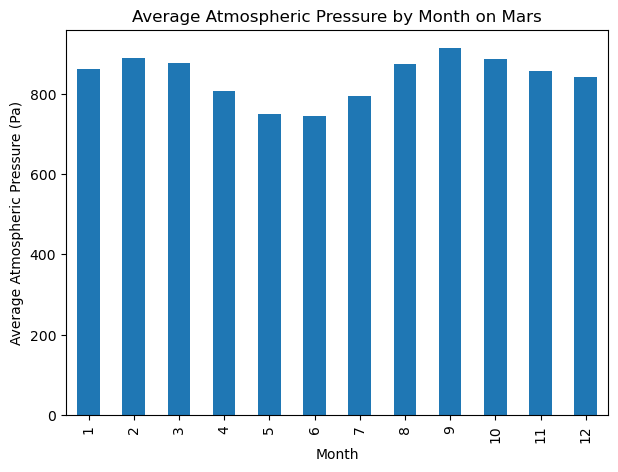

In [55]:
# Plot the average pressure by month
plt.figure(figsize=(7, 5))
avg_pressure_by_month.plot(kind='bar')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
#plt.grid(axis='y')
plt.show()

In [57]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()
sorted_avg_pressure_by_month

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

In [59]:
#display the lowest and highest pressure by month
lowest_pressure_month = sorted_avg_pressure_by_month.idxmin()
highest_pressure_month = sorted_avg_pressure_by_month.idxmax()

{"Lowest Pressure Month": lowest_pressure_month, "Highest Pressure Month": highest_pressure_month}

{'Lowest Pressure Month': 6, 'Highest Pressure Month': 9}

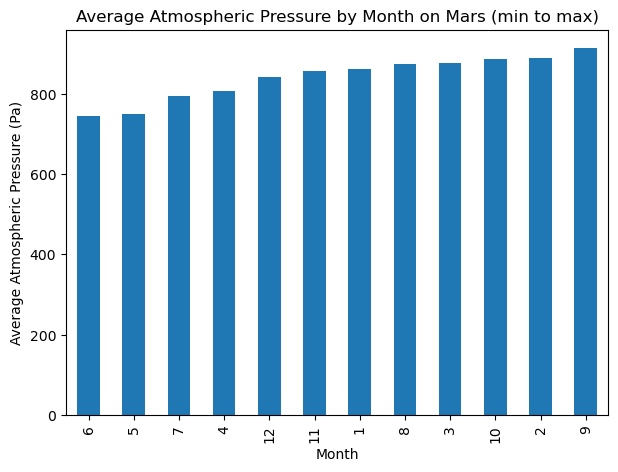

In [61]:
#plot the average atmospheric pressure by month from minimum to maximum
plt.figure(figsize=(7, 5))
sorted_avg_pressure_by_month.plot(kind='bar')
plt.title('Average Atmospheric Pressure by Month on Mars (min to max)')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
#plt.grid(axis='y')
plt.show()

In [89]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# A Martian year consists of 687 terrestrial (Earth) days.
total_terrestrial_days = mars_data['terrestrial_date'].nunique()
total_terrestrial_days

1867

In [189]:
# Sort the DataFrame by 'terrestrial_date'
date_df = mars_data.sort_values('terrestrial_date').reset_index(drop=True)
# Display
date_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure,terrestrial_day_number
0,2,2012-08-16,10,155,6,-75.0,739.0,0
1,13,2012-08-17,11,156,6,-76.0,740.0,1
2,24,2012-08-18,12,156,6,-76.0,741.0,2
3,35,2012-08-19,13,157,6,-74.0,732.0,3
4,46,2012-08-20,14,157,6,-74.0,740.0,4
...,...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0,2017
1863,1892,2018-02-24,1974,134,5,-77.0,729.0,2018
1864,1894,2018-02-25,1975,134,5,-76.0,729.0,2019
1865,1893,2018-02-26,1976,135,5,-77.0,728.0,2020


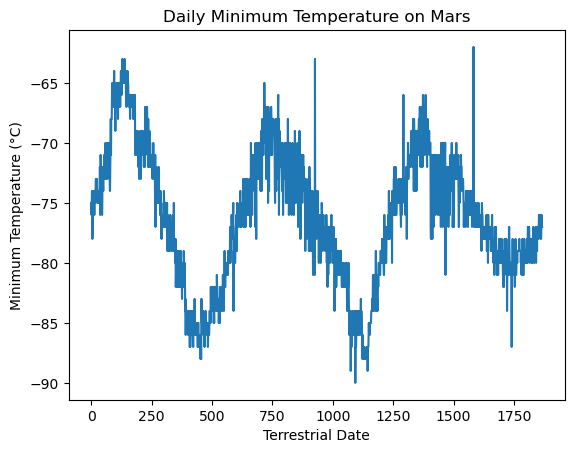

In [191]:
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
date_df.min_temp.plot()
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.show()

#### Minimum Temperature

The analysis is valuable for understanding Martian seasons, which could help in building a plan for Mars mission exploration.
From the minimum temperature data and also the graph, we can say the temperature difference between the coldest and warmest months is around 15 degress celscius. It is highlighting that Mars' relatively stable with cold climate, especially compare with Earth.

#### Atmospheric Pressure

The next analysis is the average atmospheric pressure (in Pascals) for each month on Mars, sorted by month. Lowest pressures occurs in Month 6 (mid year) and highest pressure occurs in Month 9 (towards the end of the year). The atmospheric pressure shows in ascending order for each month, indicating a potential seasonal variation in Mars' atmosphere. This analysis is valuable for planning Mars exploration missions. Since the atmospheric pressure on Mars is significantly thinner than Earth's, it provides much less aerodynamic drag. This factor must be carefully considered when designing entry, descent, and landing (EDL) systems for spacecraft, as well as for the operation of aerial vehicles such as drones or helicopters on Mars.

#### Year Length

The graph shows clear, cyclical patterns, indicating seasonal temperature changes on Mars. The temperatures fluctuate between -65°C (warmer seasons), likely corresponding to Martian summers, and -90°C (colder seasons) likely corresponding to Martian winters. In the graph, it looks like 3 full cycles correspond to three Martian Year (~ 687 Earth days/martian year). The first data was taken in 2012-08-16 and the last data was taken 2018-02-27, it was approximately 5 years 6 month with Earth calendar.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [199]:
# Write the data to a CSV
output_file = "mars_data.csv"

# Write the DataFrame to a CSV file
mars_data.to_csv(output_file, index=False)

In [197]:
browser.quit()